### Trabalho Final
##### https://wallissoncarvalho.github.io/HydroBr/

In [77]:
import hydrobr
import geopandas as gpd
import folium
import contextily as cx
from plotly.offline import plot 
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [4]:
# Obtendo dados de precipitação
precStations=hydrobr.get_data.ANA.list_prec_stations()

#vizualizando tabela
precStations.head()


,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
0,SALINÓPOLIS,00047000,2,32,SALINÓPOLIS,PARÁ,INMET,-0.6500,-47.5500,1958/01/01,1964/12/31,7,25.0,0,100.0
1,SALINÓPOLIS,00047002,2,32,SALINÓPOLIS,PARÁ,ANA,-0.6231,-47.3536,1977/12/09,2019/08/31,43,3.5,35,18.6
2,CURUÇA,00047003,2,32,CURUÇA,PARÁ,ANA,-0.7375,-47.8536,1981/07/01,2019/07/31,39,2.4,29,25.6
3,PRIMAVERA,00047004,2,32,PRIMAVERA,PARÁ,ANA,-0.9294,-47.0994,1982/02/18,2019/08/31,38,0.0,35,7.9
4,MARUDA,00047005,2,32,MARAPANIM,PARÁ,ANA,-0.6336,-47.6583,1989/08/21,2019/07/31,31,5.0,20,35.5


In [5]:
#Conferindo numero de linhas (estações)
precStations.shape

(11976, 15)

In [9]:
# filtrando os dados para Santa Catarina
precSC=precStations[precStations['State']=='SANTA CATARINA']

#Conferindo a quantidade de estações
linhas,colunas=precSC.shape
print(f'O número de estações em Santa Catarina é {linhas}')

#Vizualizar dados
precSC.head()

O número de estações em Santa Catarina é 268


,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD
10947,GASPAR,02648000,2,83,GASPAR,SANTA CATARINA,ANA,-26.9167,-48.9500,1935/01/01,1966/12/31,32,0.5,31,3.1
10948,ILHOTA-JUSANTE,02648001,2,83,ILHOTA,SANTA CATARINA,ANA,-26.9217,-48.8392,1927/09/24,2015/06/30,89,15.5,63,29.2
10949,LUIZ ALVES,02648002,2,83,LUIZ ALVES,SANTA CATARINA,ANA,-26.7242,-48.9317,1941/01/01,2019/08/31,79,7.3,64,19.0
10950,POSTO ESTRADA BLUMENAU KM 18,02648003,2,82,JOINVILLE,SANTA CATARINA,DNOS,-26.3667,-48.9833,1985/01/01,1989/12/31,5,15.1,4,20.0
10951,GUARAMIRIM,02648004,2,82,GUARAMIRIM,SANTA CATARINA,DNOS,-26.4667,-48.9500,1952/10/01,1968/12/31,17,0.5,15,11.8


#### Como o objetivo é interpolar a orecipitação média anual no território de SC, a precipitação nas fronteiras do estado é influenciada pela precipitação dos estados vizinhos. Assim, será considerada as estações a 100 km da fronteira. 

In [11]:
# Substitua 'data_final' pelo nome real da sua coluna de data final
precStations.sort_values(by='EndDate', ascending=False, inplace=True)

# Exiba a tabela ordenada
#print(precStations)

In [80]:
# Vamos fazer buffer do mapa de SC
shapefile_path = r'D:\MestradoUFSCok\DadosBrutos\SC_limite.shp'
SC = gpd.read_file(shapefile_path)
SC

,NM_ESTADO,NM_REGIAO,CD_GEOCUF,geometry
0,SANTA CATARINA,SUL,42,"MULTIPOLYGON (((713007.553 6833160.307, 712994..."


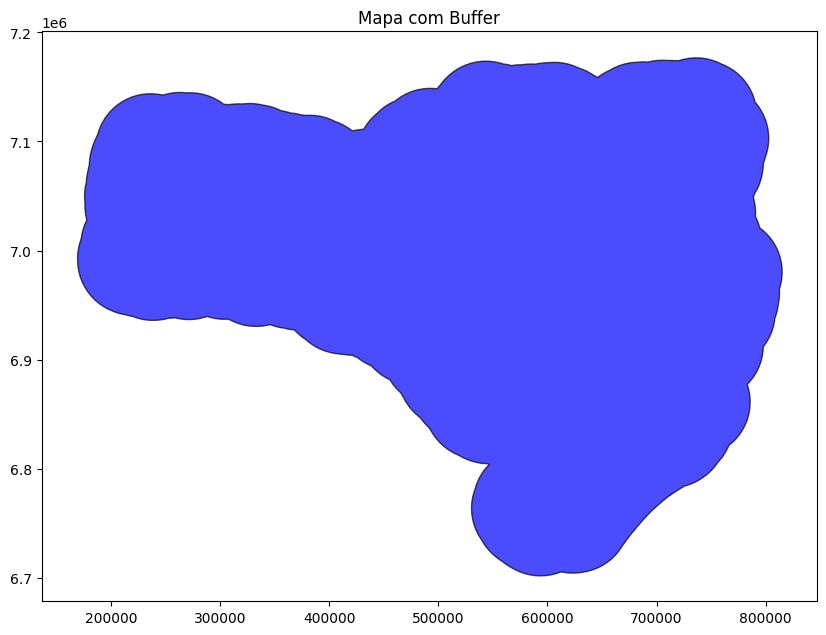

In [81]:
# Criar buffer
buffer_size = 50000  # em metros

# Crie o buffer para cada geometria na coluna 'geometry'
SC['geometry'] = SC['geometry'].buffer(buffer_size)

# Salve o novo GeoDataFrame em um novo arquivo shapefile
output_shapefile_path = r'D:\MestradoUFSCok\DadosBrutos\Pluviosidade\SCbuffer.shp'
SC.to_file(output_shapefile_path)

# Crie uma figura e um eixo
fig, ax = plt.subplots(figsize=(10, 10))

# Plote as geometrias do GeoDataFrame
SC.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7)

# Adicione um título
plt.title('Mapa com Buffer')

# Mostre o mapa
plt.show()

In [82]:
# Salve o novo GeoDataFrame em um novo arquivo shapefile
# Criar uma coluna 'geometry' com objetos Point a partir das colunas 'x' e 'y'
precStations['geometry'] = precStations.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Criar um GeoDataFrame a partir da tabela
Estacoes = gpd.GeoDataFrame(precStations, geometry='geometry')

# Definir o sistema de referência espacial (ESG)
Estacoes.crs = 'EPSG:4326'  # Substitua pelo código ESG desejado

# Salvar o GeoDataFrame como um shapefile
Estacoes.to_file(r'D:\MestradoUFSCok\DadosBrutos\Pluviosidade\teste.shp')


C:\Users\edinei.acm\AppData\Local\Temp\ipykernel_12624\3823833943.py:12: UserWarning:

Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.



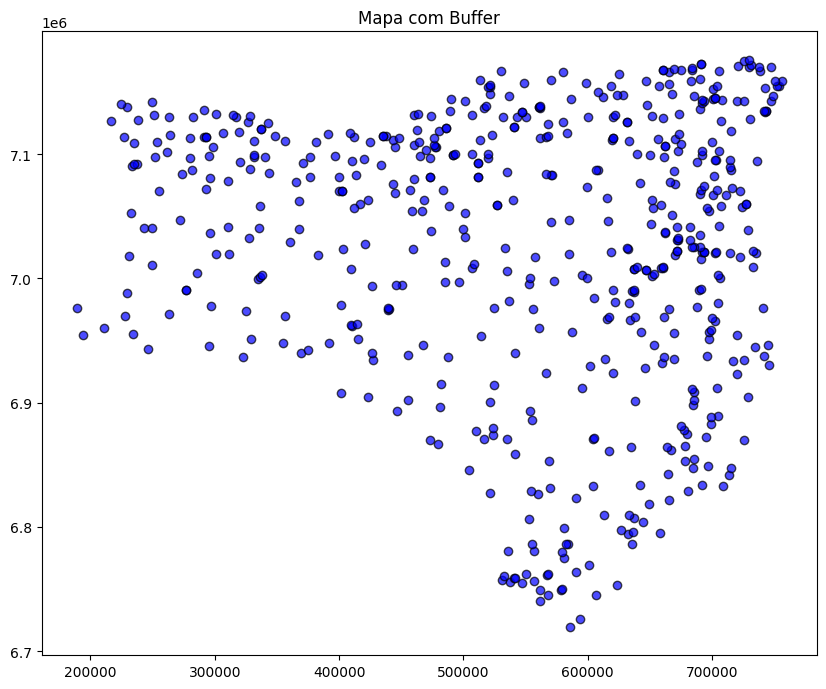

,Name,Code,Type,SubBasin,City,State,Responsible,Latitude,Longitude,StartDate,EndDate,NYD,MD,N_YWOMD,YWMD,geometry
11527,LAGOA DOS QUADROS,02950018,2,87,MAQUINÉ,RIO GRANDE DO SUL,DEPRC,-29.6500,-50.1167,1947/09/10,1978/12/31,32,0.3,29,9.4,POINT (585491.339 6719670.435)
11545,TERRA DE AREIA,02950038,2,87,TERRA DE AREIA,RIO GRANDE DO SUL,ANA,-29.5911,-50.0336,1974/01/01,2019/10/31,46,3.4,31,32.6,POINT (593589.071 6726132.902)
11537,SANTA TERESA,02950030,2,87,SÃO FRANCISCO DE PA,RIO GRANDE DO SUL,CEEE,-29.4667,-50.3667,1946/02/15,1978/12/31,33,0.0,31,6.1,POINT (561404.907 6740139.280)
11531,POTREIRO NOVO,02950024,2,87,SÃO FRANCISCO DE PA,RIO GRANDE DO SUL,CEEE,-29.4167,-50.3000,1946/02/28,1970/09/28,25,0.3,23,8.0,POINT (567905.585 6745642.414)
11534,RIO DOS CARVALHOS,02950027,2,87,ITATI,RIO GRANDE DO SUL,CEEE,-29.3856,-50.1908,1998/01/01,2000/12/31,3,2.4,2,33.3,POINT (578523.092 6749019.883)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10557,ETE SANEPAR - MATINHOS,02548089,2,82,MATINHOS,PARANÁ,AGUASPARANÁ,-25.7764,-48.5153,2008/01/14,2017/09/30,10,17.2,6,40.0,POINT (749180.737 7146727.534)
10539,PRAIA DE LESTE,02548061,2,82,PONTAL DO PARANÁ,PARANÁ,ANA,-25.7000,-48.4667,1948/10/16,1953/08/31,6,12.0,1,83.3,POINT (754219.262 7155100.324)
10493,PRAIA DE LESTE,02548009,2,82,PARANAGUÁ,PARANÁ,DNOS,-25.7000,-48.4833,1957/07/01,1965/07/31,9,0.0,7,22.2,POINT (752552.759 7155132.194)
10520,IPANEMA,02548037,2,82,PONTAL DO PARANÁ,PARANÁ,AGUASPARANÁ,-25.6667,-48.4500,1971/08/06,2015/12/31,45,40.5,20,55.6,POINT (755967.038 7158757.951)


In [83]:
#Vamos recortar as estações dentro desse buffer

# Reprojetar 'Estacoes' para o SRC de 'SC'
Estacoes_reprojetado = Estacoes.to_crs(SC.crs)
#Executar o clip
estacoesEstudo = gpd.clip(Estacoes_reprojetado, SC)

# Crie uma figura e um eixo
fig2, ax = plt.subplots(figsize=(10, 10))

# Plote as geometrias do GeoDataFrame
estacoesEstudo.plot(ax=ax, color='blue', edgecolor='black', alpha=0.7)

# Adicione um título
plt.title('Mapa com Buffer')

# Mostre o mapa
plt.show()
estacoesEstudo

In [95]:
# Analisando preliminarmente as estações
# Substitua 'data final' pelo nome real da sua coluna de data final
estacoesEstudo['EndDate'] = pd.to_datetime(estacoesEstudo['EndDate'])
estacoesEstudo['AnoFinal'] = estacoesEstudo['EndDate'].dt.year
estacoesEstudo['StartDate'] = pd.to_datetime(estacoesEstudo['StartDate'])
estacoesEstudo['AnoInicial'] = estacoesEstudo['StartDate'].dt.year

# Agrupar e contar
contagem_estacoes_por_ano_final = estacoesEstudo.groupby('AnoFinal')['Code'].count()
contagem_estacoes_por_MissingData = estacoesEstudo.groupby('MD')['Code'].count()
contagem_estacoes_por_ano_inicial = estacoesEstudo.groupby('AnoInicial')['Code'].count()
contagem_estacoes_por_Anos_DadosCompletos = estacoesEstudo.groupby('N_YWOMD')['Code'].count()
contagem_estacoes_por_Anos_PorcComDadosFaltantes = estacoesEstudo.groupby('YWMD')['Code'].count()



In [99]:
#Conferindo a quantidade de estações
linhas,colunas=estacoesEstudo.shape
print(f'O número de estações em Santa Catarina é {linhas}')

O número de estações em Santa Catarina é 553


In [107]:
# São muitas estação, vamos excluir aquelas cujos datos terminam antes do ano 2010
# Converter as colunas 'StartDate' e 'EndDate' para o tipo de data
estacoesEstudo['EndDate'] = pd.to_datetime(estacoesEstudo['EndDate'], format='%Y/%m/%d', errors='coerce')

# Filtrar as linhas com datas entre 2010/01/01 e 2020/12/31
Estacoes_filtrado = estacoesEstudo[(estacoesEstudo['EndDate'] >= '2010-12-31')]

# Criar uma nova coluna 'geometry' com objetos Point a partir das colunas 'Longitude' e 'Latitude'
Estacoes_filtrado['geometry'] = Estacoes_filtrado.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# Criar um novo GeoDataFrame a partir do GeoDataFrame filtrado
Estacoes_novo = gpd.GeoDataFrame(Estacoes_filtrado, geometry='geometry')

#Conferindo a quantidade de estações
linhas,colunas=Estacoes_novo.shape
print(f'O número de estações na área de estudo, com dados além de 2010 é {linhas}')

# Verificar o novo GeoDataFrame
print(Estacoes_novo)

O número de estações na área de estudo, com dados além de 2010 é 294
                         Name      Code  Type  SubBasin                 City  \
11545          TERRA DE AREIA  02950038     2        87       TERRA DE AREIA   
11541          SERRA DO PINTO  02950034     2        87                ITATI   
11559            VILA TAINHAS  02950063     2        86  SÃO FRANCISCO DE PA   
11554          MÃE DOS HOMENS  02950056     2        84         PRAIA GRANDE   
11528          LAJEADO GRANDE  02950019     2        86  SÃO FRANCISCO DE PA   
...                       ...       ...   ...       ...                  ...   
10560                FLORESTA  02548093     2        82             MORRETES   
10666    PONTE DO UMBARAZINHO  02549124     2        65  SÃO JOSÉ DOS PINHAI   
10562         MARTA - SAGRADO  02548095     2        82             MORRETES   
10557  ETE SANEPAR - MATINHOS  02548089     2        82             MATINHOS   
10520                 IPANEMA  02548037     2      

In [109]:
# To get the list of prec stations - source='ANAF' is the standard
stations_code = Estacoes_novo.Code.to_list()[:294] 
#Gettin the data
data_stations = hydrobr.get_data.ANA.prec_data(stations_code)



  0%|                                                                                          | 0/294 [00:00<?, ?it/s]C:\Users\edinei.acm\pyenv2\Lib\site-packages\hydrobr\get_data.py:177: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

  1%|▌                                                                               | 2/294 [00:49<2:00:07, 24.68s/it]C:\Users\edinei.acm\pyenv2\Lib\site-packages\hydrobr\get_data.py:177: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

  1%|▊                        

In [111]:
data_stations

,02950038,02950034,02950063,02950056,02950019,02850020,02851051,02850027,02850025,02850026,...,02749013,02749006,02749039,02749051,02749003,02749053,02749001,02649001,02649007,02649005
1929-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-27,0.0,0.0,0.0,2.3,37.0,5.5,2.7,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2023-01-28,0.0,0.0,11.7,0.0,7.4,0.0,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2023-01-29,0.0,0.0,0.0,0.0,37.1,2.9,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN
2023-01-30,0.0,0.5,0.0,29.0,0.3,0.0,2.5,NaN,NaN,NaN,...,0.0,0.0,10.7,NaN,0.0,NaN,NaN,29.3,NaN,NaN


In [112]:
data_stations.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34364 entries, 1929-01-01 to 2023-01-31
Freq: D
Columns: 235 entries, 02950038 to 02649005
dtypes: float64(235)
memory usage: 61.9 MB


In [113]:
#Grafico de gantt
gantt_fig = hydrobr.Plot.gantt(data_stations) #Get the Gantt Fig

#Updating the layout
gantt_fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    xaxis_title = 'Year',
    yaxis_title = 'Station Code',
    font=dict(family="Courier New, monospace", size=12))

#To plot and save the gantt plot as html
plot(gantt_fig,filename='gantt' + '.html') 

ValueError: Unit M is not supported. Only unambiguous timedelta values durations are supported. Allowed units are 'W', 'D', 'h', 'm', 's', 'ms', 'us', 'ns'